In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 회귀 트리(Regression Tree)

- 트리 기반의 회귀 알고리즘
- 트리 생성 방식은 분류 트리와 같으나, 리프 노드에서 예측 결정 값을 만드는 과정이 다름
    - 리프 노드에 속하는 데이터 값의 평균값을 구해 회귀 예측값으로 결정

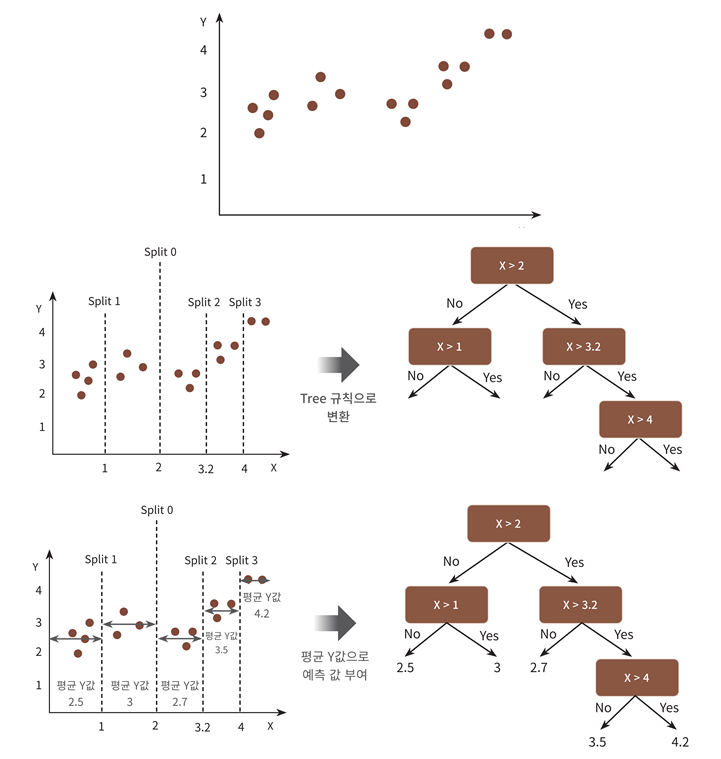

### 사이킷런의 회귀를 위한 결정 트리 기반의 클래스들

- 결정트리, 랜덤포레스트, GBM, XGBoost, LightGBM 모두 회귀 분석 가능

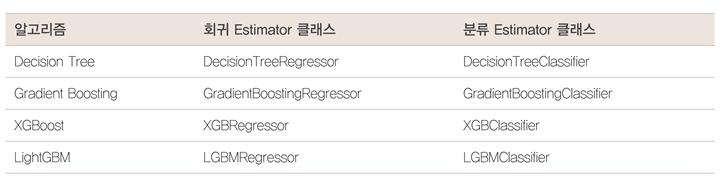

--------------------------------

## 실습. 보스턴 주택 가격 예측

### 보스턴 주택가격 데이터 세트 로드

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

In [4]:
boston = pd.read_csv('data/boston.csv')

### features & target

In [5]:
x = boston.drop('price', axis=1)
y = boston.price

### 교차검증 및 예측 성능 출력 함수 작성

In [6]:
def reg_model_cv_training(model, x, y, cv=5, scoring='neg_mean_squared_error', alpha=None):
    neg_mse = cross_val_score(model, x,y, cv= cv, scoring= scoring)
    rmse = np.sqrt(neg_mse*(-1))
    avg_rmse = np.mean(rmse)
    if alpha:
        text = 'alpha='+ str(alpha)
    else:
        text= ''
    print(f'-- {model.__class__.__name__} {text}의 {cv}폴드 교차검증 --')
    print(f'RMSE: {np.round(rmse,3)}, AVG_RMSE: {np.round(avg_rmse,3)}')
    return rmse, avg_rmse

### 모델1. 랜덤포레스트

In [7]:
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
reg_model_cv_training(rf, x, y)

-- RandomForestRegressor 의 5폴드 교차검증 --
RMSE: [2.808 3.625 4.536 6.799 4.345], AVG_RMSE: 4.423


(array([2.80764971, 3.62534618, 4.5358454 , 6.7989607 , 4.34489293]),
 4.422538982804892)

### 모델2. 다양한 유형의 회귀트리 모델을 이용한 보스턴 주택 가격 예측

- 의사결정트리(DecisionTreeRegressor)
- 부스팅
    - GradientBoostingRegressor
    - XGBRegressor
    - LGBMRegressor

In [10]:
dt = DecisionTreeRegressor(max_depth= 4, random_state=0)
rf = RandomForestRegressor(n_estimators= 1000, random_state= 0)
gb = GradientBoostingRegressor(n_estimators=1000, random_state= 0)
xgb = XGBRegressor(n_estimators= 1000)
lgb = LGBMRegressor(n_estimators= 1000)


scores_df = pd.DataFrame()

for model in [dt, rf, gb, xgb, lgb]:
    rmse, avg_rmse = reg_model_cv_training(model,x,y)
    model_name = model.__class__.__name__
    score = pd.Series({'rmse': rmse, 'avg_rmse': avg_rmse})
    scores_df[model_name] = score

scores_df

-- DecisionTreeRegressor 의 5폴드 교차검증 --
RMSE: [3.456 6.021 5.444 6.872 8.097], AVG_RMSE: 5.978
-- RandomForestRegressor 의 5폴드 교차검증 --
RMSE: [2.808 3.625 4.536 6.799 4.345], AVG_RMSE: 4.423
-- GradientBoostingRegressor 의 5폴드 교차검증 --
RMSE: [2.741 3.81  4.424 6.281 4.089], AVG_RMSE: 4.269
-- XGBRegressor 의 5폴드 교차검증 --
RMSE: [2.93  5.447 5.127 6.529 4.764], AVG_RMSE: 4.959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.566089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,XGBRegressor,LGBMRegressor
rmse,"[3.455732453965519, 6.021074829990241, 5.44372...","[2.8076497053655394, 3.6253461781170806, 4.535...","[2.7414937385368603, 3.809861972089468, 4.4237...","[2.9298572936525695, 5.44690668070298, 5.12698...","[2.9931790071200104, 4.310150005677497, 4.1296..."
avg_rmse,5.977957,4.422539,4.268998,4.959252,4.646441


In [11]:
scores_df.T

,rmse,avg_rmse
DecisionTreeRegressor,"[3.455732453965519, 6.021074829990241, 5.44372...",5.977957
RandomForestRegressor,"[2.8076497053655394, 3.6253461781170806, 4.535...",4.422539
GradientBoostingRegressor,"[2.7414937385368603, 3.809861972089468, 4.4237...",4.268998
XGBRegressor,"[2.9298572936525695, 5.44690668070298, 5.12698...",4.959252
LGBMRegressor,"[2.9931790071200104, 4.310150005677497, 4.1296...",4.646441


**회귀트리의 피처변수별 중요도**
- Regressor 클래스는 회귀계수 제공 속성 coef_ 가 없음
- 대신 feature_importances_를 이용해 피처별 중요도 제공

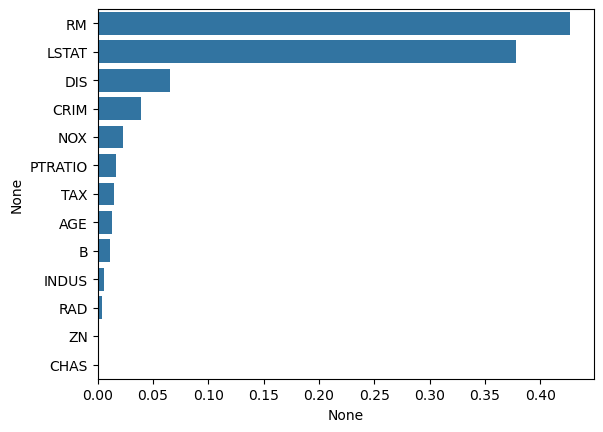

In [15]:
rf = RandomForestRegressor(n_estimators = 1000, random_state= 0)
rf.fit(x,y)

ftr_imp = pd.Series(rf.feature_importances_, index= x.columns)
ftr_imp_sort = ftr_imp.sort_values(ascending=False)
sns.barplot(x= ftr_imp_sort, y= ftr_imp_sort.index)
plt.show()

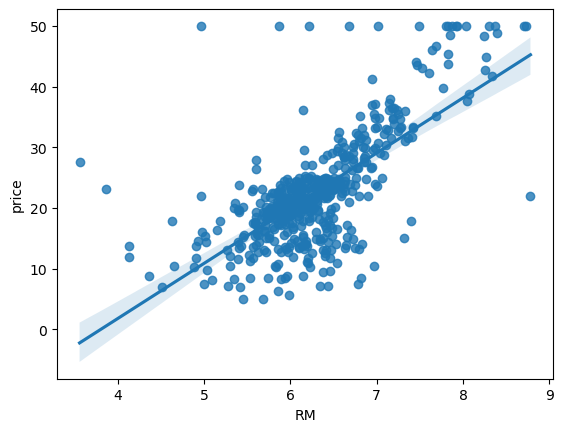

In [16]:
sns.regplot(data= boston, x= 'RM', y='price')
plt.show()

### 모델3. 주택가격 데이터 셋에서  'RM' 변수와 'PRICE' 변수 만 선택하여 단순회귀분석

- 독립변수 : 'RM' (거주할 수 있는 방의 수)
- 종속변수 : 'PRICE' (주택 가격)
- 데이터 개수 : 100

#### 데이터셋 생성

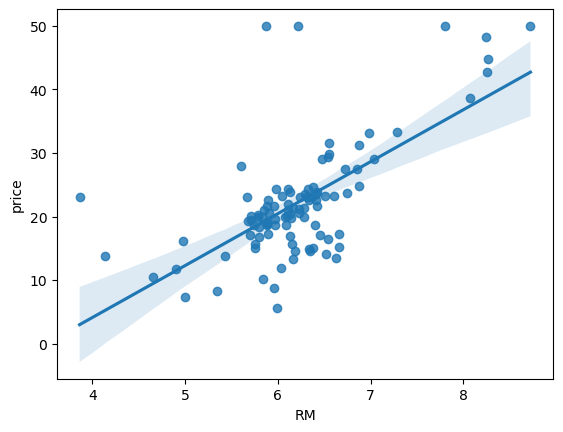

In [17]:
# .sample -> 랜덤 샘플 추출
sample = boston[['RM','price']].sample(n=100, random_state=0)
sns.regplot(data=sample, x='RM', y='price')
plt.show()

**회귀트리로 주택가격 예측**

In [19]:
# 학습 데이터 셋
x_train = sample.RM.values.reshape(-1,1)
y_train = sample.price.values.reshape(-1,1)

# 테스트 데이터 셋(임의로 만듦)
x_test = np.arange(4.5,8.5, 0.04).reshape(-1,1)

# 모델객체
lr = LinearRegression()
dt2 = DecisionTreeRegressor(max_depth=2)
dt4 = DecisionTreeRegressor(max_depth=4)
dt7 = DecisionTreeRegressor(max_depth=7)

# 학습
lr.fit(x_train,y_train)
dt2.fit(x_train,y_train)
dt4.fit(x_train,y_train)
dt7.fit(x_train,y_train)

# 예측
pred_lr = lr.predict(x_test)
pred_dt2 = dt2.predict(x_test)
pred_dt4 = dt4.predict(x_test)
pred_dt7 = dt7.predict(x_test)

**에측한 회귀직선 시각화**

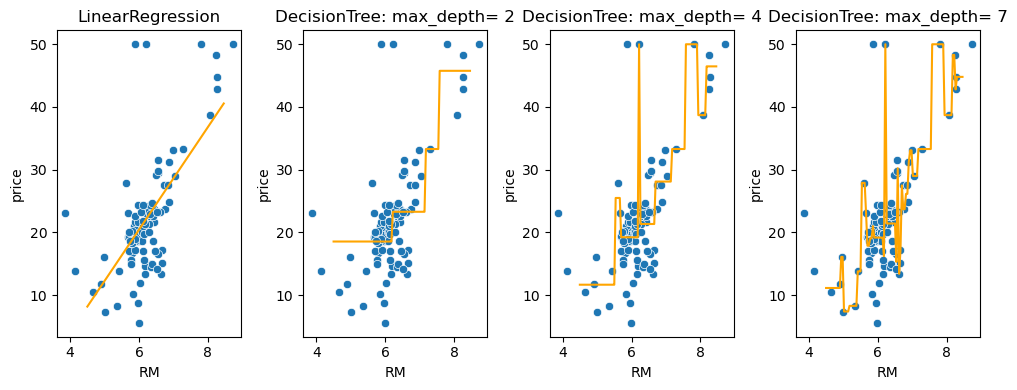

In [23]:
fig, ax = plt.subplots(figsize=(10,4), ncols=4)

sns.scatterplot(data= sample, x='RM',y='price', ax=ax[0])
ax[0].plot(x_test, pred_lr, 'orange')
ax[0].set_title('LinearRegression')

sns.scatterplot(data= sample, x='RM',y='price', ax=ax[1])
ax[1].plot(x_test, pred_dt2, 'orange')
ax[1].set_title('DecisionTree: max_depth= 2')

sns.scatterplot(data= sample, x='RM',y='price', ax=ax[2])
ax[2].plot(x_test, pred_dt4, 'orange')
ax[2].set_title('DecisionTree: max_depth= 4')

sns.scatterplot(data= sample, x='RM',y='price', ax=ax[3])
ax[3].plot(x_test, pred_dt7, 'orange')
ax[3].set_title('DecisionTree: max_depth= 7')

plt.tight_layout()
plt.show()

-----------